In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [9]:
dfs = [pd.read_csv(f'dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]

In [10]:
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)

data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [11]:
data

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Attaining - Take 1 / Alternate Version,John Coltrane,spotify:track:3EwLV5hZqLKx5e0Lp1QcB7,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,So Fly,NB Ridaz Featuring Gemini,spotify:track:2BjIi07kN0yKSur0Fwrnss,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,Because I Got It Like That,Jungle Brothers,spotify:track:5unLExF3iiG3YkU11u6wFO,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,Babylon a Fall - Remastered,Yabby You,spotify:track:6xfe0G2HwRDQaChxkzvNKw,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,Fins,Jimmy Buffett,spotify:track:4h0gZ422QxBRdTV14u0P8y,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,"Little Boat - Live At The Jazz Workshop, Bosto...",Gábor Szabó,spotify:track:2NgC1cZ0A2MNXePeUZAtrA,0.435,0.834,10,-10.762,1,0.0415,0.78900,0.422000,0.9320,0.708,114.130,263067,4,17.81915,10,0,1960
41102,Loser,3 Doors Down,spotify:track:1aC1IBAETh2XYGOE8kCC6t,0.499,0.880,6,-6.424,0,0.0654,0.01080,0.000028,0.2260,0.390,147.899,264800,4,55.42304,11,1,2000
41103,Peppermint Twist - Part I,Joey Dee & the Starliters,spotify:track:3RW8ZidI0OE9BnzZeNoNQv,0.326,0.816,8,-14.825,1,0.0527,0.88100,0.326000,0.1850,0.826,147.213,259267,4,25.73316,13,1,1960
41104,Muskrat Love,Captain & Tennille,spotify:track:3NRiJ7XFMALvrXXB1oRBFO,0.659,0.257,9,-16.552,1,0.0382,0.89000,0.000140,0.2520,0.222,102.977,228160,4,20.91621,13,1,1970


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

### Preprocessing

In [13]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop high-cardinality categorical columns
    df = df.drop(['track', 'artist', 'uri'], axis=1)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [15]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
17085,-0.803046,-1.153602,-0.906748,-1.115340,0.663974,-0.469839,1.596027,2.353303,-0.732449,-0.558102,0.596289,0.893514,0.252505,-0.113837,1.143941,-0.730326
5559,-1.851264,1.471369,0.226205,1.141128,-1.506083,0.289985,-0.869966,-0.413850,0.358139,-0.546842,0.305511,-0.402735,0.252505,2.363926,-1.129718,-0.159019
32888,-0.216946,0.964588,-1.473224,0.842092,0.663974,-0.398312,0.227342,-0.509835,1.320937,1.010682,1.219771,0.261257,0.252505,-0.828083,0.523852,-0.159019
14170,-1.158088,1.471369,-0.340272,0.740650,-1.506083,-0.145038,-1.073492,0.351407,0.486512,-0.122745,-0.771205,0.672481,0.252505,1.298114,0.937245,0.983596
7958,0.656568,-1.264461,-1.473224,0.218706,0.663974,-0.521432,0.560664,-0.509835,-0.318737,-1.015976,-1.251805,-0.672715,0.252505,-0.553131,-0.716326,-0.730326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1.067965,1.621820,1.075919,1.057254,-1.506083,-0.276365,-1.043411,-0.509689,1.414299,1.119521,0.240131,0.998506,0.252505,-1.142409,1.143941,-0.159019
32511,-1.242621,0.588460,-0.906748,-0.133035,-1.506083,1.072087,-0.215121,-0.509818,-0.132013,-0.381707,1.932499,1.910169,0.252505,1.016528,0.937245,-0.730326
5192,-0.819953,-1.169439,1.642396,-1.394164,-1.506083,-0.448733,-0.241669,-0.509831,0.072217,-0.081462,-0.841564,-0.668891,0.252505,-0.313843,-0.509629,0.412289
12172,0.194451,1.352592,-1.473224,0.843036,-1.506083,-0.035989,-1.068867,1.051577,2.733040,-1.068519,0.086466,0.696900,0.252505,-0.347148,-0.923022,0.983596


In [16]:
y_train

17085    0
5559     0
32888    0
14170    0
7958     1
        ..
7813     1
32511    0
5192     0
12172    0
33003    1
Name: target, Length: 28774, dtype: int64

### Training

In [27]:
models = {
    "                   Logistic Regression": LogisticRegression(),
#     "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


### Results

In [28]:
for name, model in models.items():
    try:
        accuracy = model.score(X_test, y_test) * 100
        print(f"{name}: {accuracy:.2f}%")
    except AttributeError:
        print(f"{name}: Error - model does not have score method")


                   Logistic Regression: 74.50%
                         Decision Tree: 72.48%
Support Vector Machine (Linear Kernel): 74.23%
   Support Vector Machine (RBF Kernel): 80.32%
                        Neural Network: 80.27%
                         Random Forest: 80.75%
                     Gradient Boosting: 79.87%


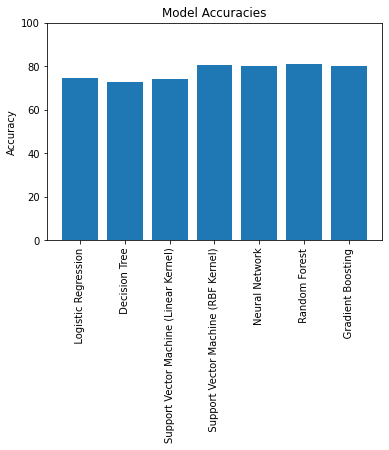

In [30]:
import matplotlib.pyplot as plt

accuracies = []

for name, model in models.items():
    try:
        accuracy = model.score(X_test, y_test) * 100
        accuracies.append(accuracy)
    except AttributeError:
        accuracies.append(None)

plt.bar(list(models.keys()), accuracies)
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.show()


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# assuming you have trained models and obtained predictions on test data
y_pred_lr = models["                   Logistic Regression"].predict(X_test)
y_pred_dt = models["                         Decision Tree"].predict(X_test)
y_pred_svm_linear = models["Support Vector Machine (Linear Kernel)"].predict(X_test)
y_pred_svm_rbf = models["   Support Vector Machine (RBF Kernel)"].predict(X_test)
y_pred_nn = models["                        Neural Network"].predict(X_test)
y_pred_rf = models["                         Random Forest"].predict(X_test)
y_pred_gb = models["                     Gradient Boosting"].predict(X_test)

# create confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# calculate evaluation metrics
accuracy = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt),            accuracy_score(y_test, y_pred_svm_linear), accuracy_score(y_test, y_pred_svm_rbf),            accuracy_score(y_test, y_pred_nn), accuracy_score(y_test, y_pred_rf),            accuracy_score(y_test, y_pred_gb)]
precision = [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt),             precision_score(y_test, y_pred_svm_linear), precision_score(y_test, y_pred_svm_rbf),             precision_score(y_test, y_pred_nn), precision_score(y_test, y_pred_rf),             precision_score(y_test, y_pred_gb)]
recall = [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt),          recall_score(y_test, y_pred_svm_linear), recall_score(y_test, y_pred_svm_rbf),          recall_score(y_test, y_pred_nn), recall_score(y_test, y_pred_rf),          recall_score(y_test, y_pred_gb)]
f1 = [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt),      f1_score(y_test, y_pred_svm_linear), f1_score(y_test, y_pred_svm_rbf),      f1_score(y_test, y_pred_nn), f1_score(y_test, y_pred_rf),      f1_score(y_test, y_pred_gb)]

# create table
import pandas as pd

data = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}
df = pd.DataFrame(data, index=["Logistic Regression", "Decision Tree", "SVM (Linear)", "SVM (RBF)",
                                "Neural Network", "Random Forest", "Gradient Boosting"])
print(df)


                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.744972   0.708558  0.831710  0.765211
Decision Tree        0.723808   0.724211  0.722330  0.723269
SVM (Linear)         0.742296   0.702278  0.840636  0.765253
SVM (RBF)            0.803195   0.759844  0.886238  0.818189
Neural Network       0.799140   0.768390  0.856053  0.809856
Random Forest        0.809196   0.781689  0.857676  0.817922
Gradient Boosting    0.798654   0.763124  0.865790  0.811222
